In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime
from pyramid.arima import auto_arima

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/alext234/coronavirus-stats/master/data/who-global-cases.csv',index_col=0)

In [3]:
del data['report_url']

In [4]:
data = data[~data.index.duplicated(keep='last')]

In [5]:
data.describe()

,global_cases
count,8.500000e+01
mean,5.059433e+05
std,6.933563e+05
min,2.798000e+03
25%,7.142900e+04
50%,1.095780e+05
75%,7.508900e+05
max,2.397216e+06


In [6]:
data.head()

,global_cases
date,
2020-01-27,2798
2020-01-28,4593
2020-01-29,6065
2020-01-30,7818
2020-01-31,9826


In [7]:
data.tail()

,global_cases
date,
2020-04-17,2074529
2020-04-18,2160207
2020-04-19,2241359
2020-04-20,2314621
2020-04-21,2397216


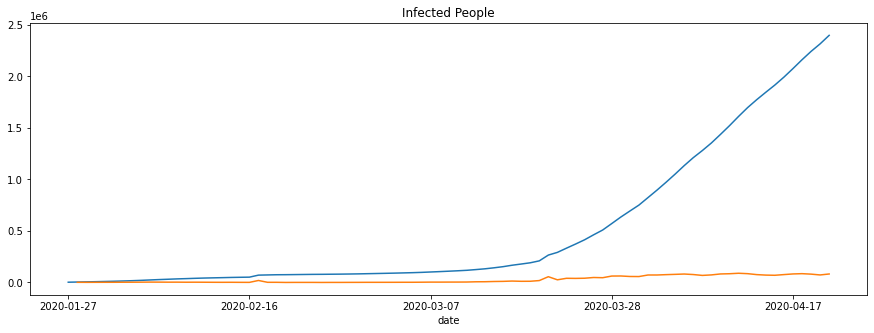

In [8]:
data.global_cases.plot(figsize=(15, 5), title='Infected People')
(data.global_cases - data.global_cases.shift(1)).plot(figsize=(15, 5))

In [9]:
predicted_days = 5
firstPredictionDay = datetime.datetime.strptime(data.index[-1], '%Y-%m-%d') + datetime.timedelta(days = 1)

In [10]:
stepwise_model = auto_arima(data.global_cases,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=1709.419, BIC=1723.932, Fit time=6.250 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1715.644, BIC=1720.481, Fit time=0.069 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1705.406, BIC=1712.663, Fit time=1.058 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1703.501, BIC=1710.757, Fit time=0.664 seconds
Fit ARIMA: order=(1, 2, 1); AIC=1705.495, BIC=1715.170, Fit time=2.571 seconds
Fit ARIMA: order=(0, 2, 2); AIC=1705.495, BIC=1715.171, Fit time=0.862 seconds
Fit ARIMA: order=(1, 2, 2); AIC=1703.118, BIC=1715.212, Fit time=3.019 seconds
Fit ARIMA: order=(1, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 3); AIC=1706.466, BIC=1723.398, Fit time=4.618 seconds
Total fit time: 19.432 seconds


In [11]:
stepwise_model.aic()

1703.117738674365

In [12]:
stepwise_model.fit(data.global_cases)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [13]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [14]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(future_forecast[x])))

2020-04-22 - 2477097
2020-04-23 - 2557394
2020-04-24 - 2638143
2020-04-25 - 2719376
2020-04-26 - 2801123
